### import data 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pylab
import statsmodels.api as sm
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warnins

In [2]:
df=pd.read_csv('co2_emission.csv')
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
MSN             5094 non-null object
YYYYMM          5094 non-null int64
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


#### converting data formate 

In [4]:
dateparse=lambda x:pd.to_datetime(x,format='%Y%m',errors = 'coerce')
data_co2 = pd.read_csv("co2_emission.csv", parse_dates=['YYYYMM'], date_parser=dateparse) 
data_co2.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [5]:
co2_emission=data_co2[data_co2.index.notnull()]

In [6]:
co2_emission.head()


,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
co2_emission['Value']=pd.to_numeric(co2_emission['Value'],errors='coerce')

In [8]:
co2_emission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5094 entries, 0 to 5093
Data columns (total 6 columns):
MSN             5094 non-null object
YYYYMM          4707 non-null datetime64[ns]
Value           4678 non-null float64
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 278.6+ KB


In [9]:
co2_emission.isnull().sum()

MSN               0
YYYYMM          387
Value           416
Column_Order      0
Description       0
Unit              0
dtype: int64

In [10]:
co2_emission.dropna(inplace=True)

#### Time series visualization 

In [11]:
energy_source=co2_emission.groupby('Description')

In [12]:
energy_source.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
566,NNEIEUS,1973-01-01,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
567,NNEIEUS,1973-02-01,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
568,NNEIEUS,1973-03-01,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
569,NNEIEUS,1973-04-01,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
570,NNEIEUS,1973-05-01,17.344,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


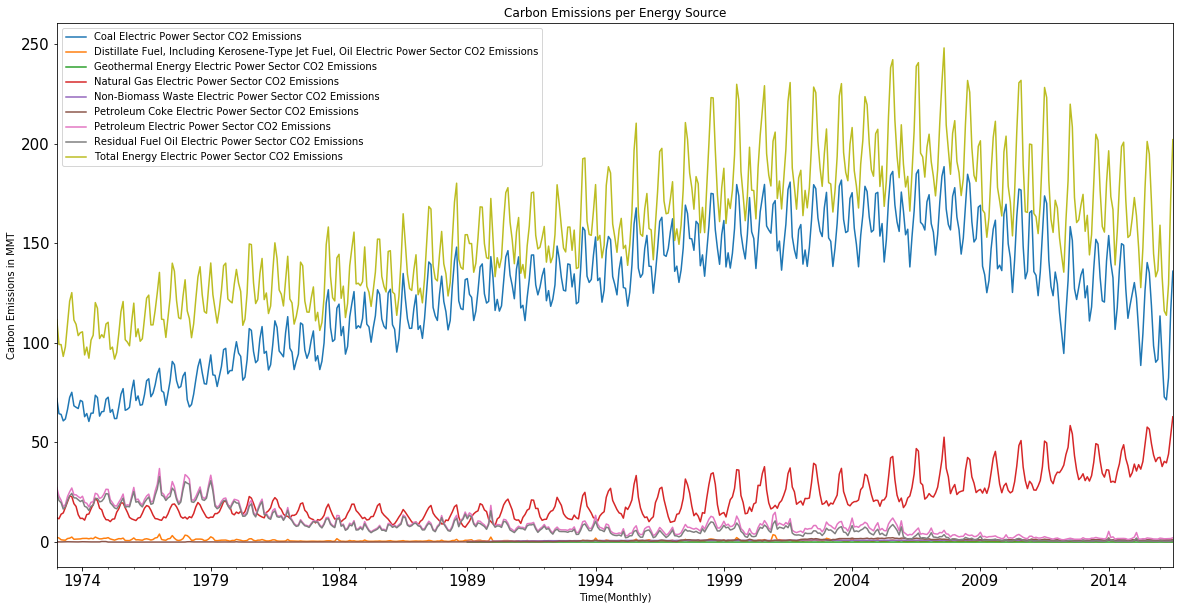

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
for desc, group in energy_source:
    group.plot(x = 'YYYYMM', y='Value', label=desc,ax = ax, title='Carbon Emissions per Energy Source', fontsize = 15)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(10)
    ax.yaxis.label.set_size(10)
    ax.legend(fontsize =10)

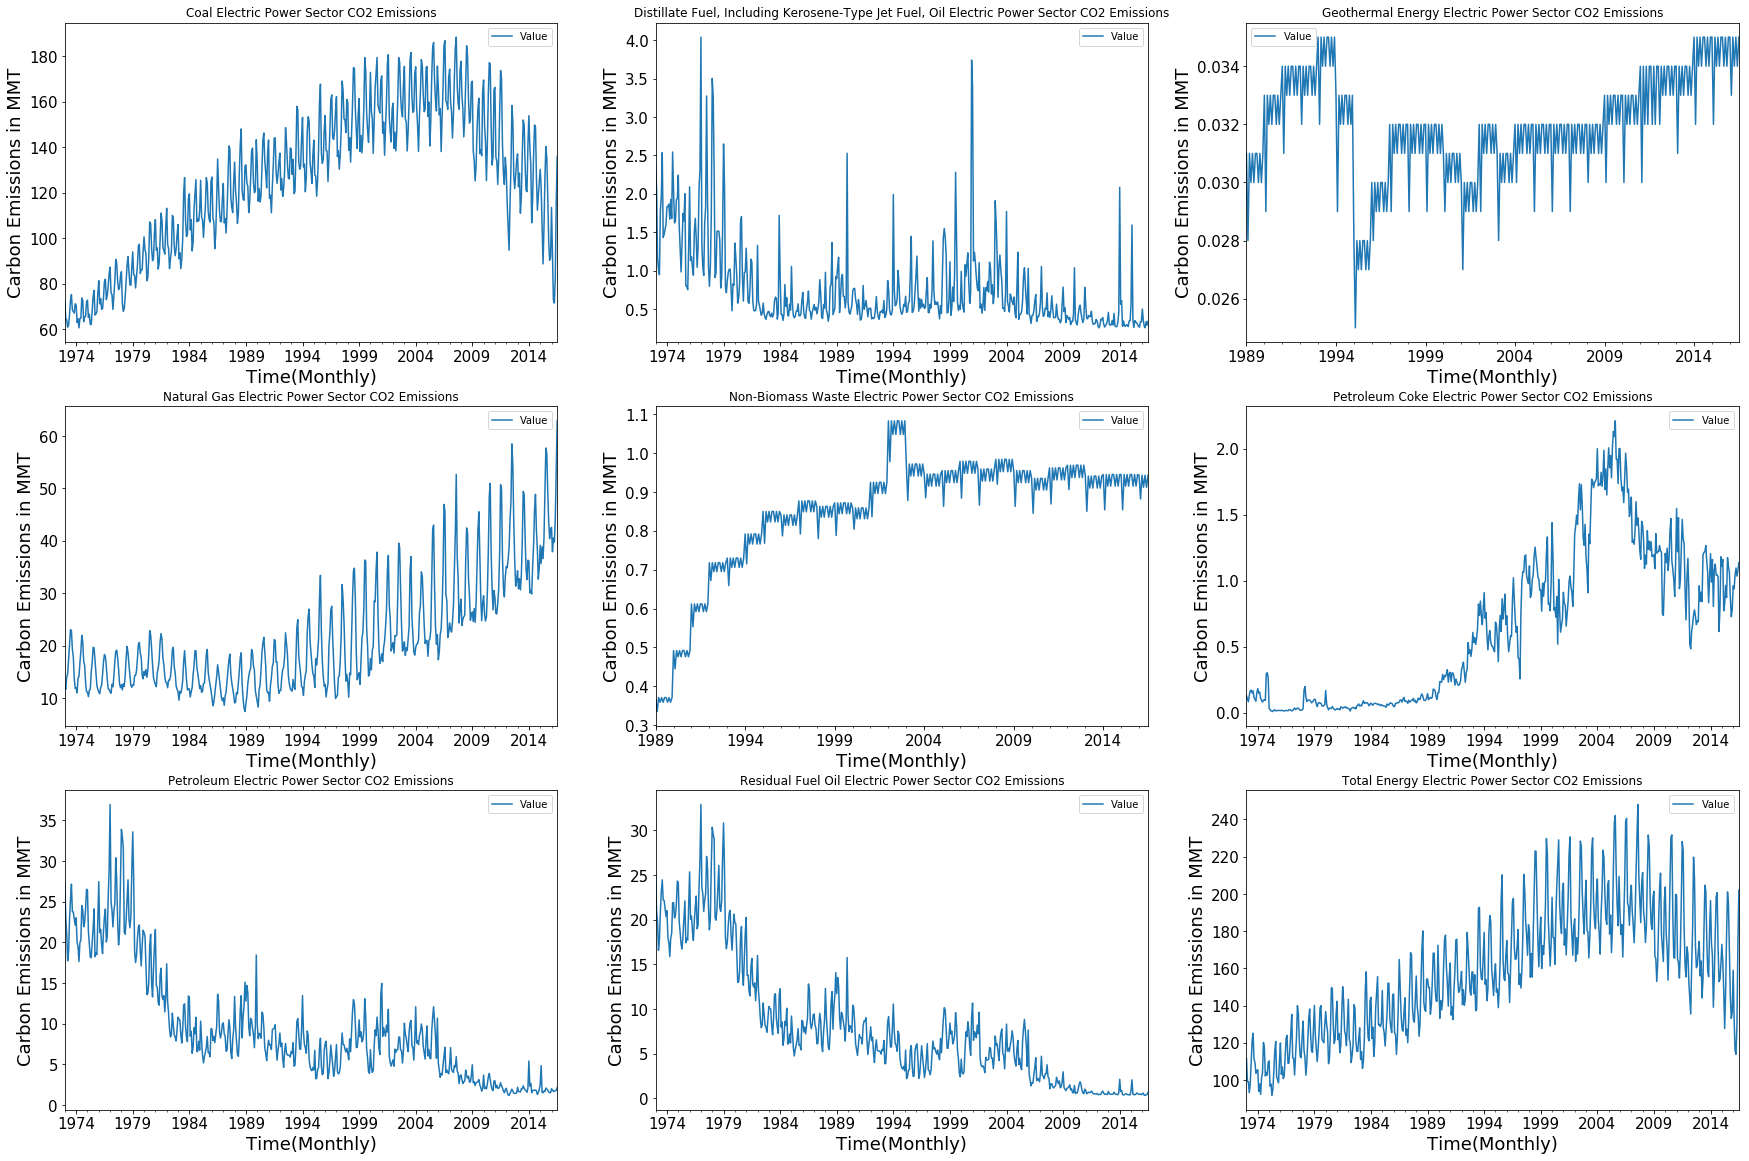

In [14]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(energy_source, axes.flatten()):
    group.plot(x = 'YYYYMM', y='Value',ax = ax, title=desc, fontsize = 15)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions in MMT')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

#### Bar chart of CO2 Emissions per energy source

In [15]:
CO2_per_source = co2_emission.groupby('Description')['Value'].sum().sort_values()

In [16]:
CO2_per_source

Description
Geothermal Energy Electric Power Sector CO2 Emissions                                            10.563
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           281.367
Petroleum Coke Electric Power Sector CO2 Emissions                                              338.785
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      404.887
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          4239.312
Petroleum Electric Power Sector CO2 Emissions                                                  4982.993
Natural Gas Electric Power Sector CO2 Emissions                                               11295.359
Coal Electric Power Sector CO2 Emissions                                                      65782.393
Total Energy Electric Power Sector CO2 Emissions                                              82352.676
Name: Value, dtype: float64

In [17]:
CO2_per_source.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [18]:
cols = ['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

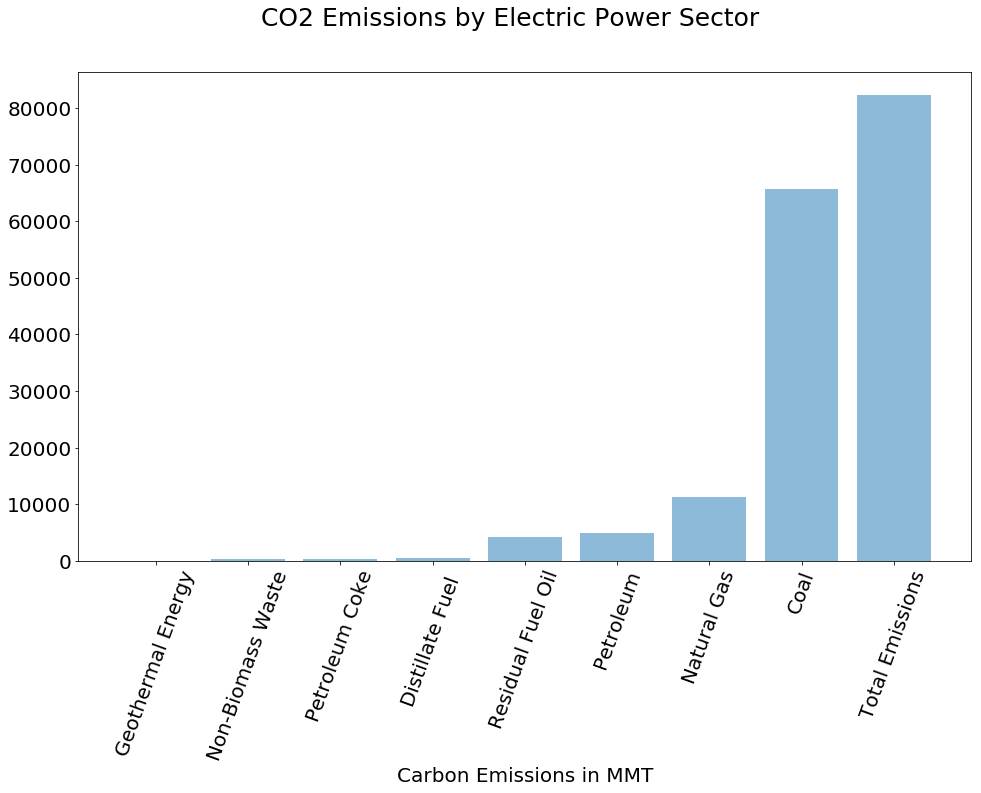

In [19]:
fig = plt.figure(figsize = (16,9))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, CO2_per_source, align = 'center', alpha = 0.5)
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Carbon Emissions in MMT', fontsize = 20)
plt.show()

#### Natural gas CO2 emission analysis

In [20]:
Emissions = co2_emission.iloc[:,1:]   # Monthly total emissions (mte)

In [21]:
Emissions.head()

,YYYYMM,Value,Column_Order,Description,Unit
0,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [22]:
emission_nat=Emissions.set_index('YYYYMM')
emission_nat= emission_nat.groupby(['Description', pd.TimeGrouper('M')])['Value'].sum().unstack(level = 0)

In [23]:
emission_nat.head()

Description,Coal Electric Power Sector CO2 Emissions,"Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions",Geothermal Energy Electric Power Sector CO2 Emissions,Natural Gas Electric Power Sector CO2 Emissions,Non-Biomass Waste Electric Power Sector CO2 Emissions,Petroleum Coke Electric Power Sector CO2 Emissions,Petroleum Electric Power Sector CO2 Emissions,Residual Fuel Oil Electric Power Sector CO2 Emissions,Total Energy Electric Power Sector CO2 Emissions
YYYYMM,,,,,,,,,
1973-01-31,72.076,2.375,NaN,12.175,NaN,0.128,27.369,24.867,111.621
1973-02-28,64.442,2.061,NaN,11.708,NaN,0.106,23.034,20.867,99.185
1973-03-31,64.084,1.171,NaN,13.994,NaN,0.083,21.034,19.780,99.112
1973-04-30,60.842,1.022,NaN,14.627,NaN,0.130,17.714,16.562,93.183
1973-05-31,61.798,0.949,NaN,17.344,NaN,0.167,18.870,17.754,98.012


In [24]:
nat_gas = emission_nat['Natural Gas Electric Power Sector CO2 Emissions'] # monthly total emissions

In [25]:
nat_gas.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

#### Test Stationary

In [26]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

#### Graphycally test stationary

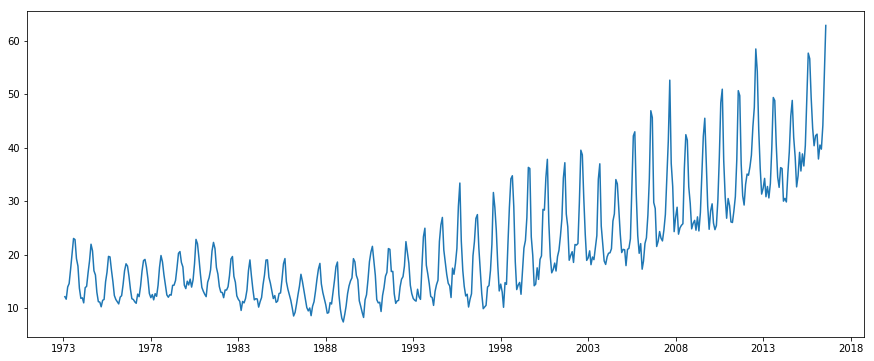

In [27]:
fig = plt.figure(figsize = (15,6))
plt.plot(nat_gas)

#### Test stationary using Dickey-Fuller

In [28]:
def TestStationaryPlot(energy_source):
    rol_mean = energy_source.rolling(window = 12, center = False).mean()
    rol_std = energy_source.rolling(window = 12, center = False).std()
    fig = plt.figure(figsize = (16,9))
    plt.plot(energy_source, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    
    plt.xlabel('Time in Years', fontsize = 15)
    plt.ylabel('Total Emissions', fontsize = 15)
    plt.legend(loc='best', fontsize = 15)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 15)
    plt.show(block= True)

In [29]:
def TestStationaryAdfuller(energy_source, cutoff = 0.01):
    energy_source_test = adfuller(energy_source, autolag = 'AIC')
    energy_source_test_output = pd.Series(energy_source_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in energy_source_test[4].items():
        energy_source_test_output['Critical Value (%s)'%key] = value
    print(energy_source_test_output)
    
    if energy_source_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

#### Testing the monthly emissions time series

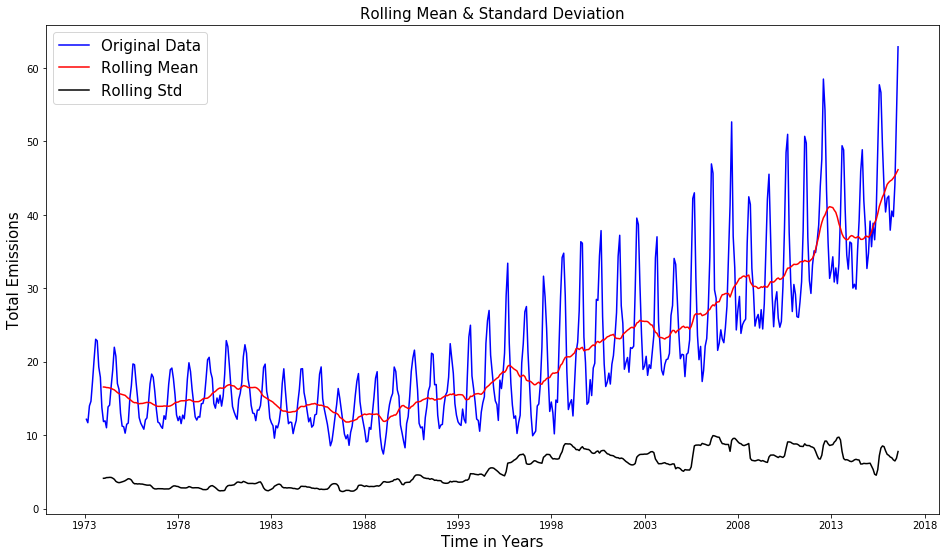

In [30]:
TestStationaryPlot(nat_gas)

In [31]:
TestStationaryAdfuller(nat_gas)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Transform the dataset to stationary

###### The most common techniques used to estimate or model trend and then remove it from the time series are

Aggregation – taking average for a time period like monthly/weekly average
Smoothing – taking rolling averages
Polynomial Fitting – fit a regression model

###  Moving average

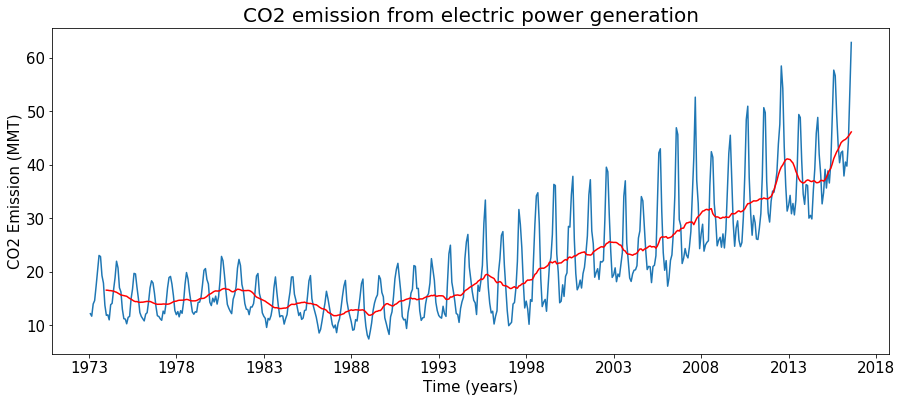

In [32]:
moving_avg = nat_gas.rolling(12).mean()
fig = plt.figure(figsize = (15,6))
plt.plot(nat_gas)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time (years)', fontsize = 15)
plt.ylabel('CO2 Emission (MMT)', fontsize = 15)
plt.title('CO2 emission from electric power generation', fontsize = 20)
plt.show()

In [33]:
nat_gas_moving_avg_diff = nat_gas - moving_avg
nat_gas_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

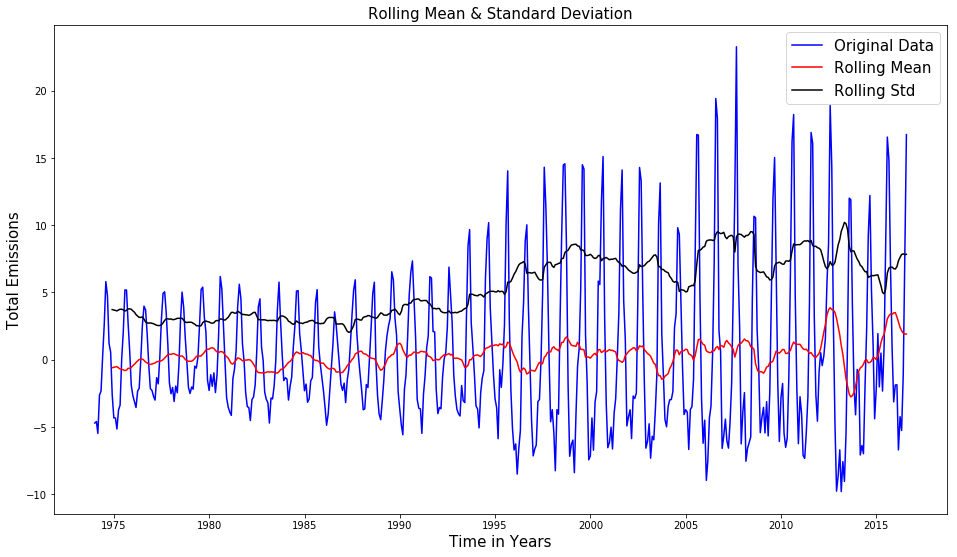

In [34]:
nat_gas_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(nat_gas_moving_avg_diff)

In [35]:
TestStationaryAdfuller(nat_gas_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


#### Exponentail weighted moving average

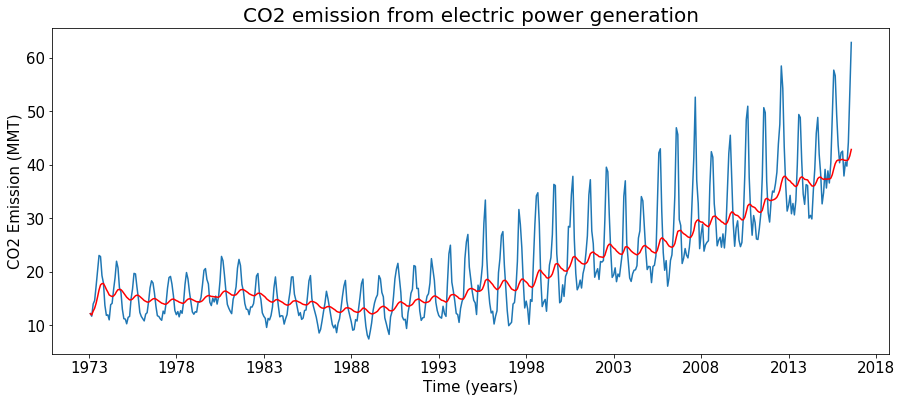

In [36]:
nat_gas_exp_wighted_avg = nat_gas.ewm(halflife=12).mean()
#pd.ewma(nat_gas, halflife=12)
fig = plt.figure(figsize = (15,6))
plt.plot(nat_gas)
plt.plot(nat_gas_exp_wighted_avg, color='red')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time (years)', fontsize = 15)
plt.ylabel('CO2 Emission (MMT)', fontsize = 15)
plt.title('CO2 emission from electric power generation', fontsize = 20)
plt.show()

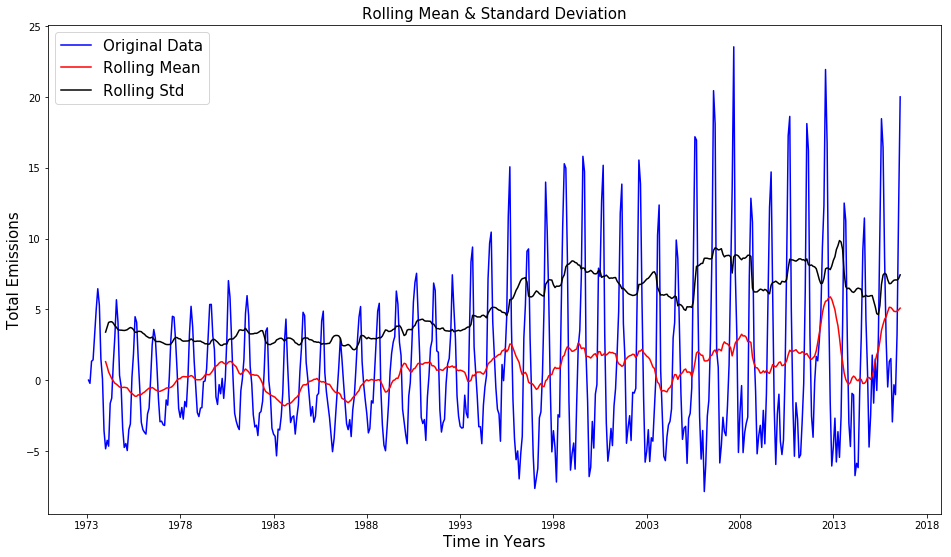

In [37]:
nat_gas_ewma_diff = nat_gas - nat_gas_exp_wighted_avg
TestStationaryPlot(nat_gas_ewma_diff)

In [38]:
TestStationaryAdfuller(nat_gas_ewma_diff)

Test Statistic                  -3.423915
p-value                          0.010170
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Eliminating trend and seasonality: Differencing

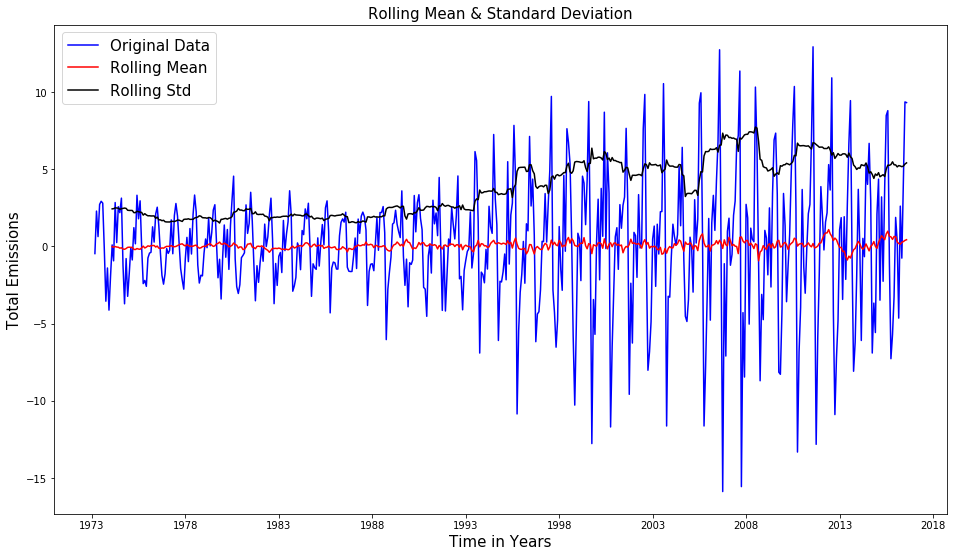

In [39]:
nat_gas_first_difference =nat_gas - nat_gas.shift(1)  
TestStationaryPlot(nat_gas_first_difference.dropna(inplace=False))

In [40]:
TestStationaryAdfuller(nat_gas_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


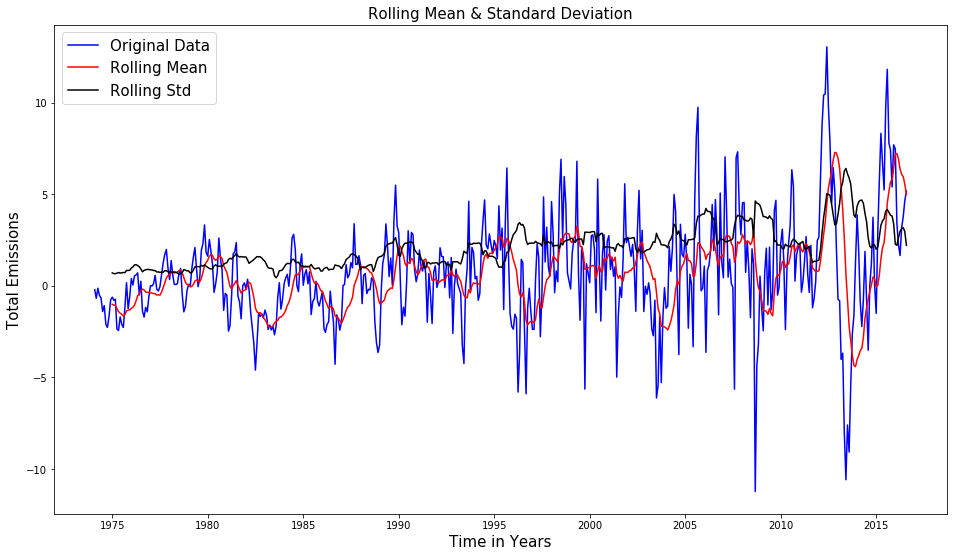

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [41]:
nat_gas_seasonal_difference = nat_gas - nat_gas.shift(12)  
TestStationaryPlot(nat_gas_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(nat_gas_seasonal_difference.dropna(inplace=False))

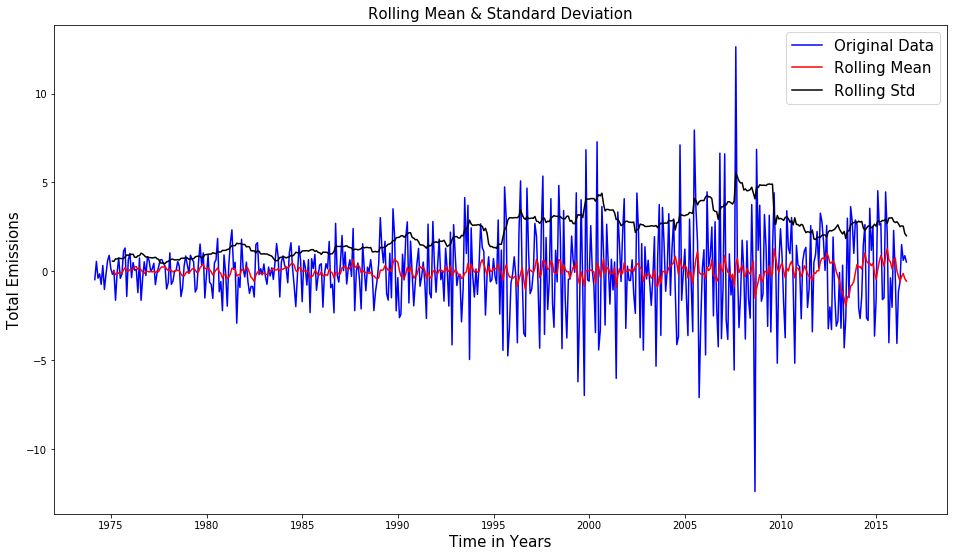

In [42]:
nat_gas_seasonal_first_difference = nat_gas_first_difference - nat_gas_first_difference.shift(12)  
TestStationaryPlot(nat_gas_seasonal_first_difference.dropna(inplace=False))

In [43]:
TestStationaryAdfuller(nat_gas_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


#### Eliminating trend and seasonality: Decomposing

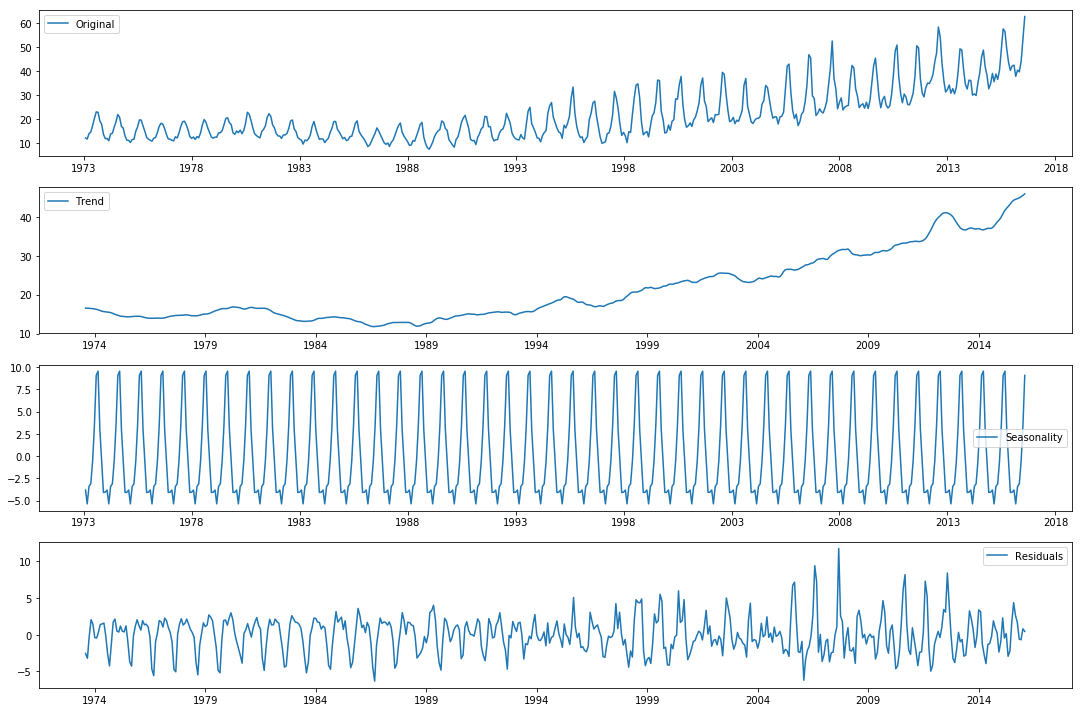

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(nat_gas)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = plt.figure(figsize = (15,10))

plt.subplot(411)
plt.plot(nat_gas, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

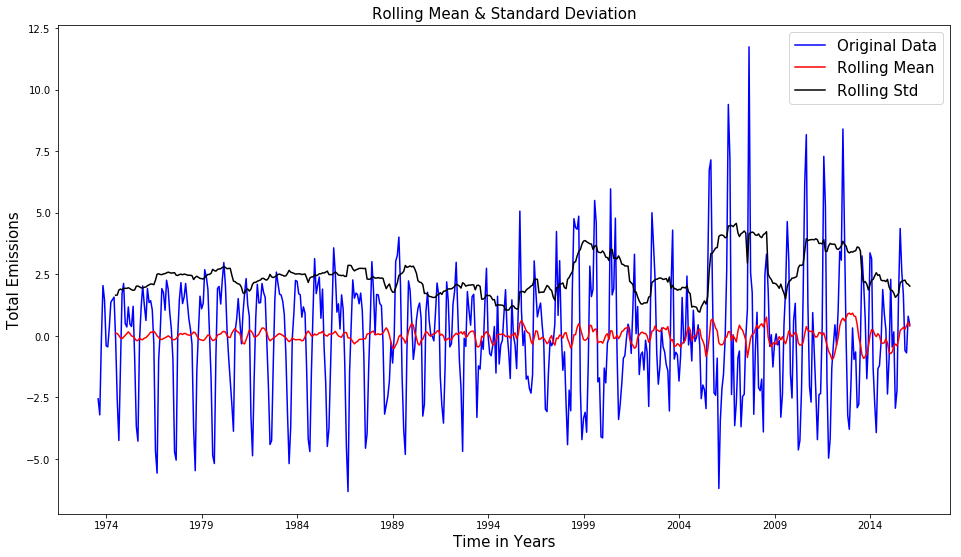

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [45]:
nat_gas_decompose = residual
nat_gas_decompose.dropna(inplace=True)
TestStationaryPlot(nat_gas_decompose)
TestStationaryAdfuller(nat_gas_decompose)

### Find optimal parameters and build SARIMA model

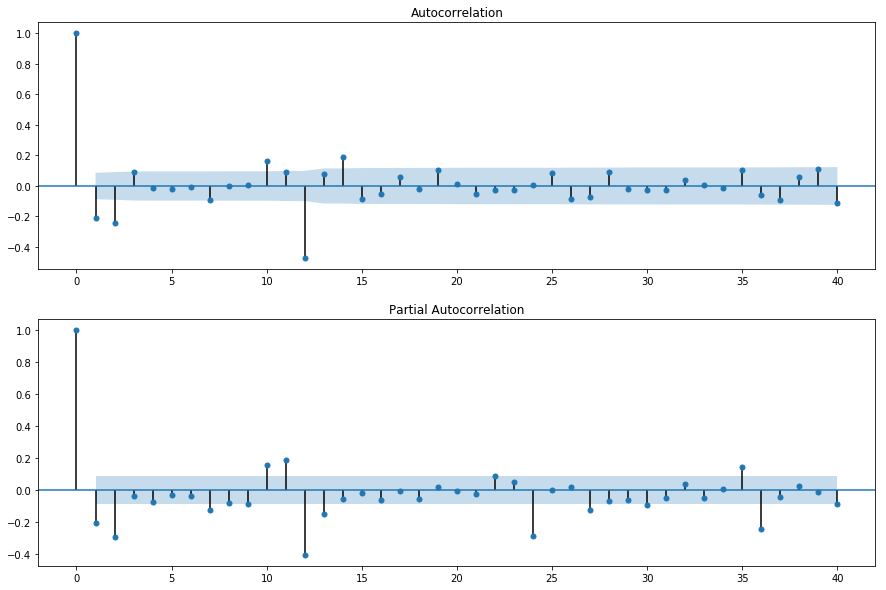

In [46]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(nat_gas_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(nat_gas_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

#### Grid search

In [47]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [48]:
print(pdq)
print(pdq_x_QDQs)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [49]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(nat_gas,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [50]:
a=[]
b=[]
c=[]
wf=pd.DataFrame()

In [51]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(nat_gas,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
wf['pdq']=a
wf['pdq_x_QDQs']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4804.065995091217
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4135.625648186428
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2572.1947577443707
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2504.209502835822
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2544.1464266167964
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2465.147262997065
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2511.043139693216
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2505.8402380709176
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4157.561225515836
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3572.105901947214
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2334.7247254090544
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2245.507386420755
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2329.0446013809424
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2218.680097741548
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2262.0627979899255
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2247.5327721889043
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2932.1335743055993
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2616.0128108187673
A

In [52]:
mod = sm.tsa.statespace.SARIMAX(nat_gas, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Mon, 04 Feb 2019   AIC                           2003.553
Time:                                                     11:34:01   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

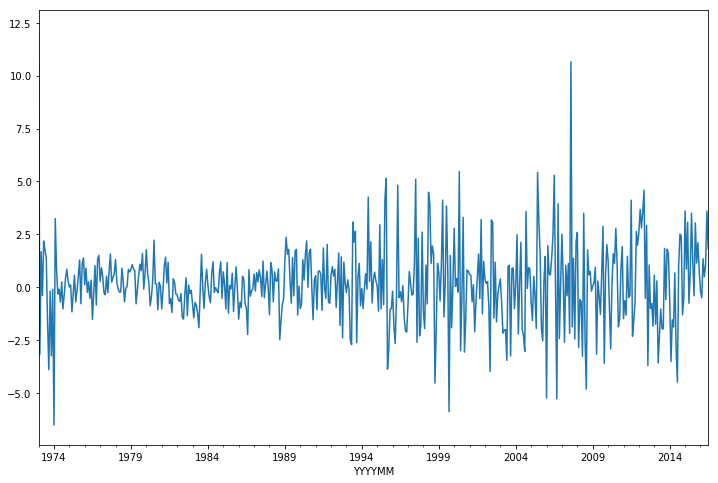

In [53]:
results.resid.plot(figsize=(12,8))

In [54]:
print(results.resid.describe())

count    523.000000
mean       0.144267
std        1.885626
min       -6.528429
25%       -0.791260
50%        0.126975
75%        1.040647
max       12.175000
dtype: float64


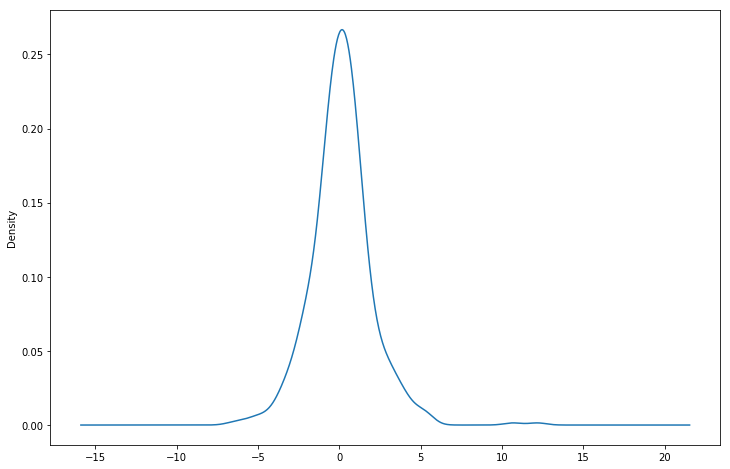

In [55]:
results.resid.plot(figsize=(12,8),kind='kde')

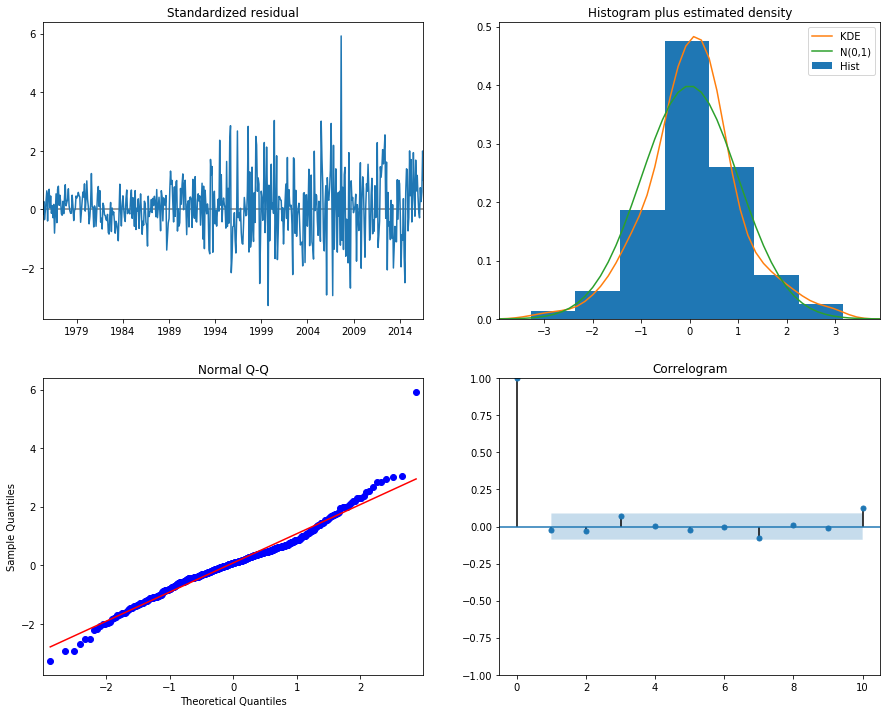

In [56]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

#### Validating prediction¶

In [57]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2013-01-31,30.203840,37.257330
2013-02-28,29.088385,36.141874
2013-03-31,28.958991,36.012480
2013-04-30,30.708077,37.761566
2013-05-31,32.104084,39.157573


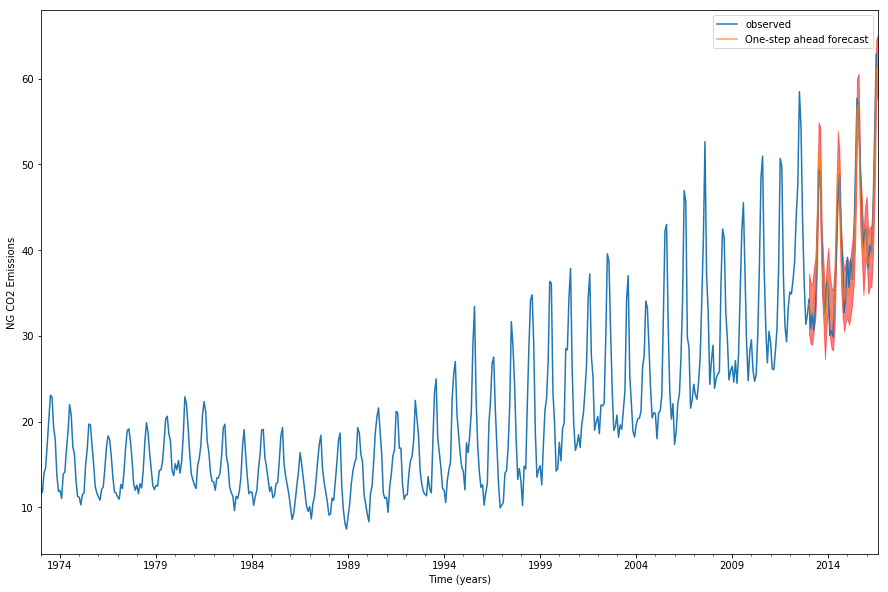

In [58]:
fig = plt.figure(figsize=(15,10))
ax = nat_gas['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [59]:
nat_gas_forecast = pred.predicted_mean
nat_gas_truth = nat_gas['2013-01-31':]

# Compute the mean square error
mse = ((nat_gas_forecast - nat_gas_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((nat_gas_forecast-nat_gas_truth)**2)/len(nat_gas_forecast))))

The Mean Squared Error (MSE) of the forecast is 4.09
The Root Mean Square Error (RMSE) of the forcast: nan


In [60]:
nat_gas_pred_concat = pd.concat([nat_gas_truth, nat_gas_forecast])

In [61]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

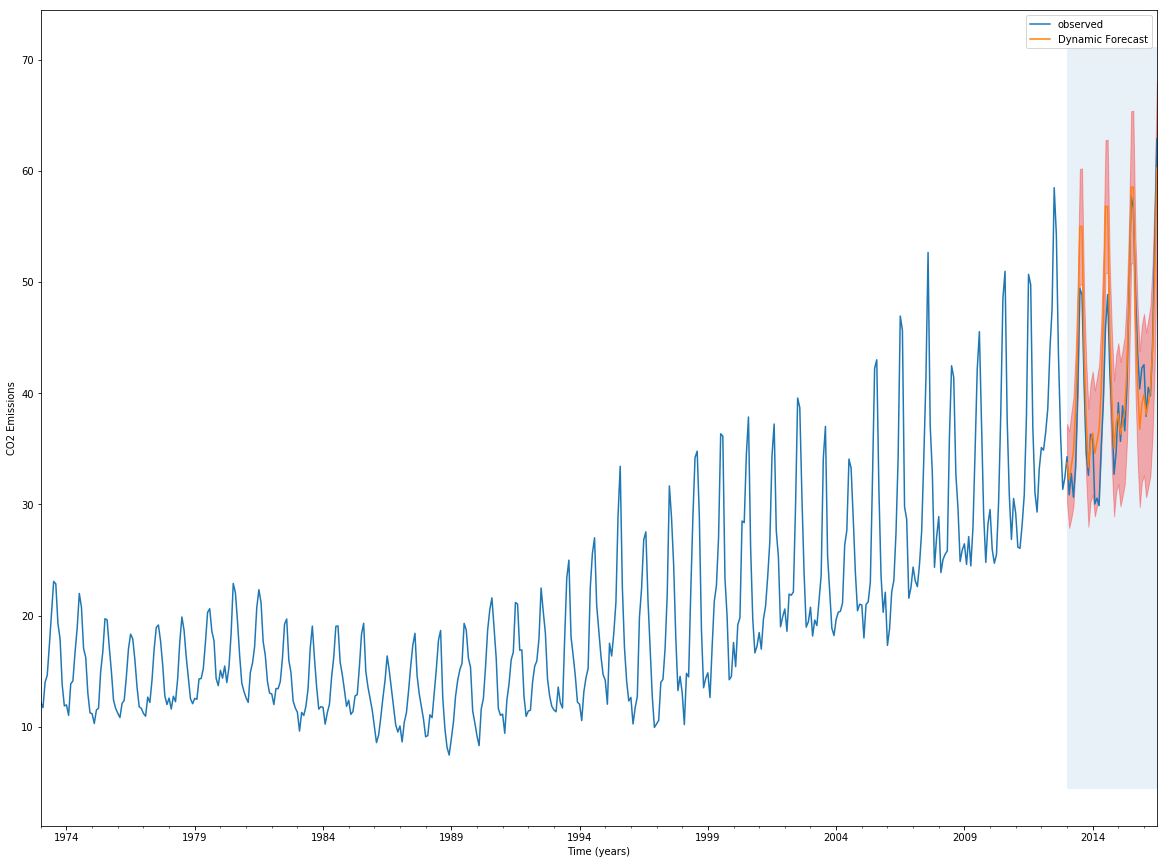

In [62]:
ax = nat_gas['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 nat_gas.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [63]:
# Extract the predicted and true values of our time series
nat_gas_forecast = pred_dynamic.predicted_mean
nat_gas_orginal = nat_gas['2013-01-31':]

# Compute the mean square error
mse = ((nat_gas_forecast - nat_gas_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((nat_gas_forecast-nat_gas_orginal)**2)/len(nat_gas_forecast))))

The Mean Squared Error (MSE) of the forecast is 14.39
The Root Mean Square Error (RMSE) of the forcast: 3.7936


### Forecasting

In [64]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Natural Gas Electric Power Sector CO2 Emissions,upper Natural Gas Electric Power Sector CO2 Emissions
2016-08-31,58.062561,65.116051
2016-09-30,47.316618,55.987496
2016-10-31,40.736078,50.163097
2016-11-30,36.175932,46.010291
2016-12-31,38.095122,48.172704


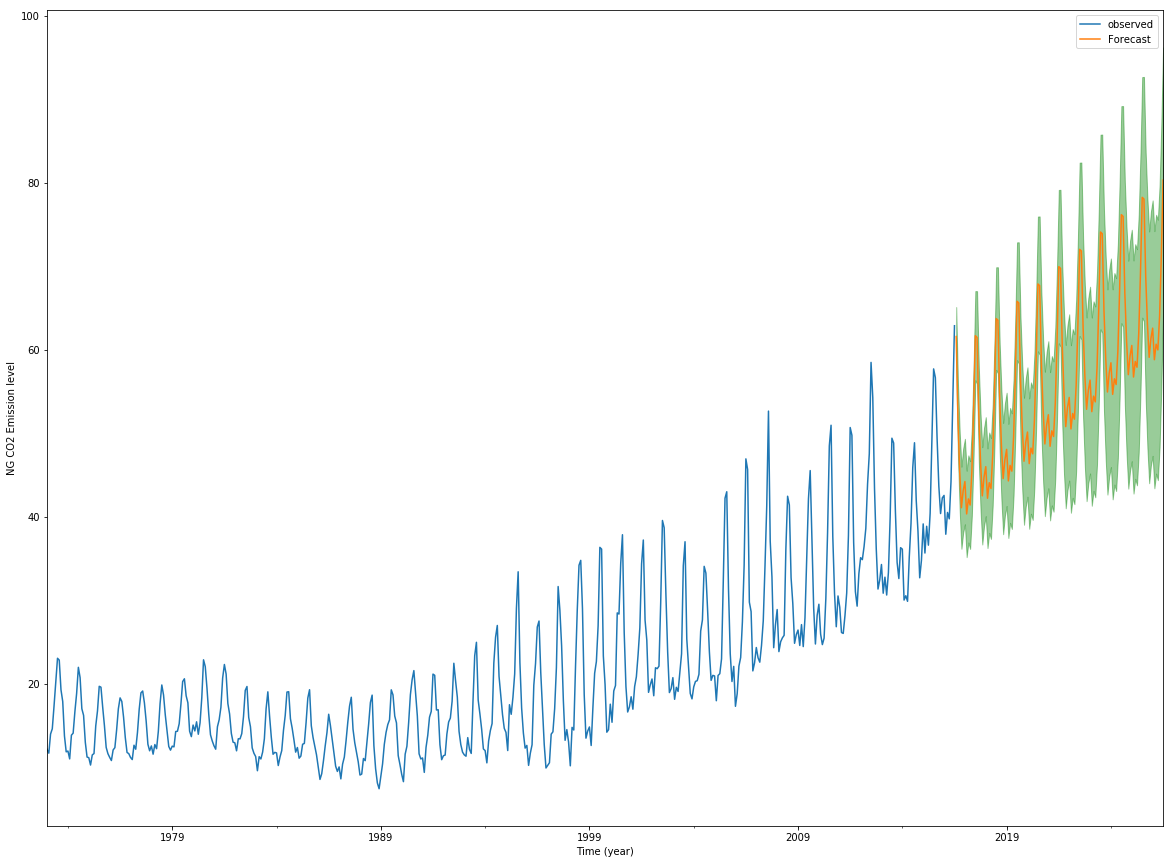

In [65]:
ax = nat_gas.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()

In [ ]:
import tensorflow as tf